In [1]:
%matplotlib inline
import pymc as pm
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
#import metropolis_commands as mc
import numpy as np
import warnings
warnings.filterwarnings("ignore")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [6]:
trials = 20
head = 4 

data = np.zeros(trials)
data[np.arange(head)]  = 1

alph = 5
bet = 2

with pm.Model() as model:
   theta = pm.Beta('theta', alpha=alph, beta=bet)
   y = pm.Bernoulli('y', p=theta, observed=data)
   trace = pm.sample()
   

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


Sampling: [y]


<Axes: xlabel='y'>

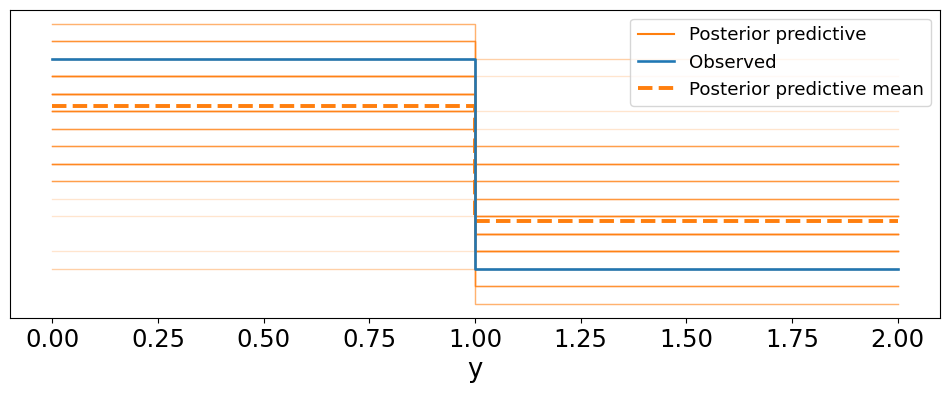

In [7]:
pm.sample_posterior_predictive(trace, model=model, extend_inferencedata=True, random_seed=123)
az.plot_ppc(trace, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

In [8]:
az.summary(trace, hdi_prob=.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.335,0.09,0.16,0.512,0.002,0.002,1655.0,2971.0,1.0


<Axes: title={'center': 'theta'}>

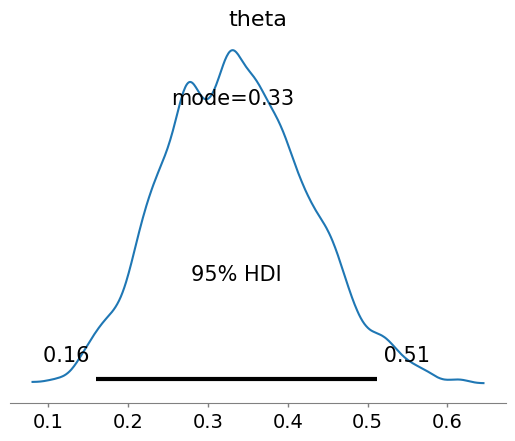

In [9]:
az.plot_posterior(trace, hdi_prob=.95, point_estimate="mode")